# King County Dataset Linear Regression Model 10

### Adjustments for this model:
    Start with getting rid of 'id', 'sqft_living15', 'sqft_lot15',
    Then deal with the NaN's in 'view', 'yr_renovated', 'waterfront', and 'sqft_basement'
    Change "?" in 'sqft_basement'
    Take care of outlier in bedrooms
    Deal with the date feature
    Bin: 'view', 'grade', 'sqft_basement', 'yr_renovated', 'waterfront'
   

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [49]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [50]:
# Change "?" in 'sqft_basement' to '0';
data.sqft_basement = data.sqft_basement.replace(to_replace = '?', value = '0')

In [51]:
# Account for missing data in 'waterfront', 'view', 'yr_renovated';
data.waterfront.fillna(value=data.waterfront.median(), inplace = True)
data.view.fillna(value=data.view.median(), inplace = True)
data.yr_renovated.fillna(value=data.yr_renovated.median(), inplace = True)
data.sqft_basement.fillna(value=data.sqft_basement.median(), inplace = True)


In [52]:
# Change outlier '33' to '3' in 'bedrooms';
data.at[15856,'bedrooms'] = 3

In [53]:
# Change 'date' feature to float;
import datetime as dt

#Run this code first and then change it!
#data["date"] = pd.to_datetime(data["date"], format = "%m/%d/%Y")
data["date"] = pd.to_datetime(data["date"], format = "%d/%m/%Y")

ValueError: time data '10/13/2014' does not match format '%d/%m/%Y' (match)

In [ ]:
plt.hist(data.date)

In [54]:
# Change 'sqft_basement' from an object to a float:
data['sqft_basement'] = data['sqft_basement'].astype(float)

In [55]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.371811,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.904096,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [56]:
# Create bins for 'yr_renovated' based on the values observed. 4 values will result in 3 bins
bins_A = [0, 1900,  2000, 2020]
bins_yr_renovated = pd.cut(data['yr_renovated'], bins_A)
#bins_yr_renovated = bins_yr_renovated.as_unordered()


yr_renovated_dummy = pd.get_dummies(bins_yr_renovated, prefix="yr-ren", drop_first=True)
data = data.drop(["yr_renovated"], axis=1)
data = pd.concat([data, yr_renovated_dummy], axis=1)

In [57]:
# Create bins for 'sqft_basement' based on the values observed. 3 values will result in 2 bins
bins_B = [0, 100, 5000]
bins_sqft_basement = pd.cut(data['sqft_basement'], bins_B)

sqft_basement_dummy = pd.get_dummies(bins_sqft_basement, prefix="sqft_base", drop_first=True)
data = data.drop(["sqft_basement"], axis=1)
data = pd.concat([data, sqft_basement_dummy], axis=1)

In [58]:
# Create bins for 'view' based on the values observed. 3 values will result in 2 bins
bins_C = [0, 2, 4]
bins_view = pd.cut(data['view'], bins_C)

view_dummy = pd.get_dummies(bins_view, prefix="new_view", drop_first=True)
data = data.drop(["view"], axis=1)
data = pd.concat([data, view_dummy], axis=1)

In [59]:
# Create bins for 'grade' based on the values observed. 4 values will result in 3 bins
bins_D = [0, 5, 7, 13]
bins_grade = pd.cut(data['grade'], bins_D)

grade_dummy = pd.get_dummies(bins_grade, prefix="new_grade", drop_first=True)
data = data.drop(["grade"], axis=1)
data = pd.concat([data, grade_dummy], axis=1)

In [60]:
# Create bins for 'waterfront' based on the values observed. 3 values will result in 2 bins
bins_E = [0, 0.5, 1]
bins_waterfront = pd.cut(data['waterfront'], bins_E)

waterfront_dummy = pd.get_dummies(bins_waterfront, prefix="new_waterfront", drop_first=True)
data = data.drop(["waterfront"], axis=1)
data = pd.concat([data, waterfront_dummy], axis=1)

In [61]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,yr_built,...,long,sqft_living15,sqft_lot15,"yr-ren_(1900, 2000]","yr-ren_(2000, 2020]","sqft_base_(100, 5000]","new_view_(2, 4]","new_grade_(5, 7]","new_grade_(7, 13]","new_waterfront_(0.5, 1.0]"
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.371811,2.115826,2080.321850,1.509941e+04,1.494096,3.409825,1788.596842,1970.999676,...,-122.213982,1986.620318,12758.283512,0.018243,0.016206,0.379636,0.038200,0.509886,0.477613,0.006760
std,2.876736e+09,3.673681e+05,0.904096,0.768984,918.106125,4.141264e+04,0.539683,0.650546,827.759761,29.375234,...,0.140724,685.230472,27274.441950,0.133833,0.126270,0.485308,0.191683,0.499914,0.499510,0.081944
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,370.000000,1900.000000,...,-122.519000,399.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,1190.000000,1951.000000,...,-122.328000,1490.000000,5100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,1560.000000,1975.000000,...,-122.231000,1840.000000,7620.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,4.000000,2210.000000,1997.000000,...,-122.125000,2360.000000,10083.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,9410.000000,2015.000000,...,-121.315000,6210.000000,871200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
X = data.drop(["id","sqft_above", "sqft_lot15", "sqft_living15", "date", "price", "lat", 'long', "zipcode"], axis=1)
y = pd.DataFrame(data, columns = ['price'])

In [63]:
import statsmodels.api as sm
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     9902.
Date:                Tue, 15 Oct 2019   Prob (F-statistic):               0.00
Time:                        21:41:16   Log-Likelihood:            -2.9818e+05
No. Observations:               21597   AIC:                         5.964e+05
Df Residuals:                   21583   BIC:                         5.965e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
bedrooms                  -5.283e+04   2318.711    -22.783      0.000   -5.74e+04   -4.83e+04
bathrooms                   311.1564   3670.805      0.085      0.932   -6883.893    7506.205
sqft_living                 275.7221      3.166     87.089      0.000     269.517     281.928
sqft_lot                     -0.3377      0.041     -8.325      0.000      -0.417      -0.258
floors                     2.371e+04   4041.755      5.865      0.000    1.58e+04    3.16e+04
condition                  5.859e+04   2572.206     22.776      0.000    5.35e+04    6.36e+04
yr_built                    -97.4336      9.343    -10.428      0.000    -115.747     -79.120
yr-ren_(1900, 2000]         7.29e+04   1.23e+04      5.941      0.000    4.89e+04     9.7e+04
yr-ren_(2000, 2020]        2.053e+05    1.3e+04     15.794      0.000     1.8e+05    2.31e+05
sqft_base_(100, 5000]      1.948e+04   3797.913      5.128      0.000     1.2e+04    2.69e+04
new_view_(2, 4]            2.097e+05   9532.604     21.999      0.000    1.91e+05    2.28e+05
new_grade_(5, 7]            5.38e+04    1.5e+04      3.586      0.000    2.44e+04    8.32e+04
new_grade_(7, 13]          1.124e+05   1.56e+04      7.224      0.000    8.19e+04    1.43e+05
new_waterfront_(0.5, 1.0]   6.27e+05   2.17e+04     28.909      0.000    5.84e+05     6.7e+05
==============================================================================
Omnibus:                    13824.673   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           529084.610
Skew:                           2.526   Prob(JB):                         0.00
Kurtosis:                      26.716   Cond. No.                     5.97e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
# Perform a train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
# A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

16197 5400 16197 5400


In [65]:
# Apply your model to the train set
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
# Calculate predictions on training and test sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# Calculate training and test residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [67]:
#Calculate the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 51606800775.554344
Test Mean Squarred Error: 58539736101.337776


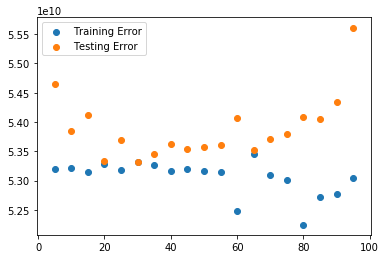

In [68]:
#Evaluate the effect of train-test split 
import random
random.seed(8)
train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [69]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_5_results

-53910908742.97792

## Results

###### R-squared: 0.865. The P value looks better as well as the test-train split.


# Column Names and descriptions for Kings County Data Set
* **id**                    Drop - categorical data, has no meaning
* **dateDate**              Object - need to change format or categorize by month or year
* **pricePrice** -          Independent Variable
* **bedroomsNumber** -      Has an outlier of 33. Either drop this row or change it to the median '3'
* **bathroomsNumber** -     Continuous
* **sqft_livingsquare** -   Continuous but could effect multicolinearity
* **sqft_lotsquare** -      Continuous but could also effect multicolinearity
* **floorsTotal** -         Categorical 
* **waterfront** -          Has missing data, lots of zeros, and is categorical - drop or clean up and bin
* **view** -                Also has missing data, is categorical - clean up and bin
* **condition** -           Categorical - could be binned
* **grade** -               Categorical - could be binned
* **sqft_above** -          Continuous but could effect multilinearity - probably going to drop
* **sqft_basement** -       Missing data, has many "?", and is an object. 
* **yr_built** -            Continuous
* **yr_renovated** -        Has lots of zeros
* **zipcode** -             Categorical data - could be dropped or binned based on location.
* **lat** -                 
* **long** -                
* **sqft_living15** -       Continuous but with outliers - also could effect multicoliniarity.
* **sqft_lot15** -          Continuous but with outliers - also could effect multicoliniarity.